In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers, models
from get_processed_data import get_processed_data
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, ClusterCentroids, NearMiss
from scikeras.wrappers import KerasClassifier
import tensorflow as tf
from tensorflow import keras
from sampling import undersample, oversample, smote, ncr
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, roc_curve, auc, confusion_matrix,
    roc_auc_score, precision_recall_curve
)

### Splitting data

In [2]:
df4, X_train, y_train, X_val, y_val, X_test, y_test = get_processed_data()
# X_train.to_csv(r"C:\Users\760421\Downloads\P_FAILING_HEAD.csv", index=False)


Training set shape: (12335, 55) (12335,)
Validation set shape: (1542, 55) (1542,)
Test set shape: (1542, 55) (1542,)


In [3]:
input_size = X_train.shape[1]  # Number of features in the input layer
output_size = 1  # For binary classification

# Choose the number of neurons for the hidden layer
hidden_layer_neurons = int((input_size + output_size) / 2)
hidden_layer_neurons


28

In [8]:
# def ann():
#     model = keras.Sequential([
#     layers.Dense(28, activation='relu', input_shape=(55,)),
#     # layers.Dense(10, activation='relu'),
#     layers.Dense(1, activation='sigmoid')
#     ])
   
#     model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#     return model

def ann(optimizer='adam', activation='relu', dropout_rate=0.0, hidden_units=16, learning_rate=0.01):
    model = keras.Sequential()
    model.add(layers.Dense(hidden_units, activation=activation, input_shape=(55,)))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

def train_ann(X_train, y_train, X_test, y_test, sampling_technique,class_weights=None,param_grid=None):
    
    model = KerasClassifier(build_fn=ann, epochs=10)

    model.fit(X_train, y_train, epochs=30, batch_size=32,class_weight=class_weights)

    # Predict on the test set
    y_pred = model.predict(X_test)
    y_pred_classes = [1 if i>0.5 else 0 for i in y_pred]

    # Print classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred_classes))
    
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    Recall = round(recall_score(y_test, y_pred)*100,2)
    Precision = round(precision_score(y_test, y_pred)*100,2)
    f1 = round(f1_score(y_test, y_pred)*100,2)
    accuracy = round(accuracy_score(y_test, y_pred)*100,2)
    
    metrics = [sampling_technique, Recall, Precision, f1,accuracy]
    # Generate ROC curve and calculate AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_classes)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve ({sampling_technique}')
    plt.legend(loc='lower right')
    plt.show()
        
    return metrics

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/30
386/386 [==============================] - 2s 3ms/step - loss: 0.8760 - accuracy: 0.9100
Epoch 2/30
386/386 [==============================] - 1s 3ms/step - loss: 0.2881 - accuracy: 0.9335
Epoch 3/30
386/386 [==============================] - 1s 3ms/step - loss: 0.2446 - accuracy: 0.9388
Epoch 4/30
386/386 [==============================] - 1s 4ms/step - loss: 0.2528 - accuracy: 0.9387
Epoch 5/30
386/386 [==============================] - 1s 3ms/step - loss: 0.2564 - accuracy: 0.9380
Epoch 6/30
386/386 [==============================] - 1s 3ms/step - loss: 0.2513 - accuracy: 0.9371
Epoch 7/30
386/386 [==============================] - 1s 3ms/step - loss: 0.2332 - accuracy: 0.9377
Epoch 8/30
386/386 [==============================] - 1s 3ms/step - loss: 0.2510 - accuracy: 0.9349
Epoch 9/30
386/386 [==============================] - 1s 3ms/step - loss: 0.2396 - accuracy: 0.9376
Epoch 10/30
386/386 [==============================] - 1s 4ms/step - loss: 0.2366 - accuracy: 0.9355

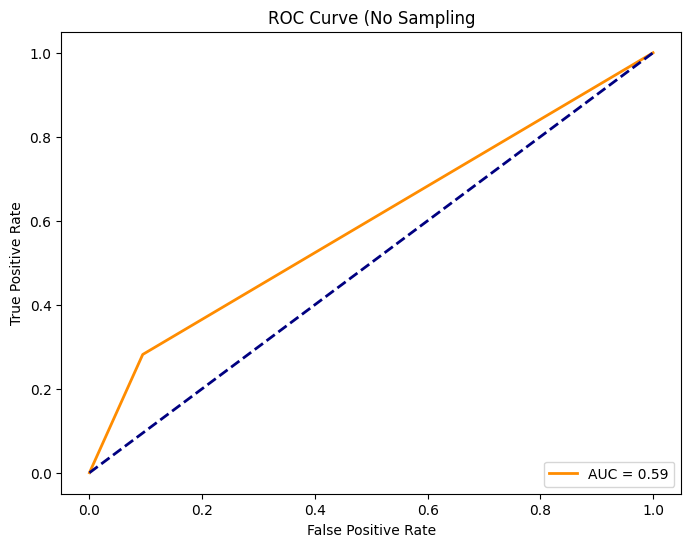

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/30
726/726 [==============================] - 3s 3ms/step - loss: 0.3193 - accuracy: 0.8657
Epoch 2/30
726/726 [==============================] - 2s 3ms/step - loss: 0.1691 - accuracy: 0.9390
Epoch 3/30
726/726 [==============================] - 2s 3ms/step - loss: 0.1497 - accuracy: 0.9444
Epoch 4/30
726/726 [==============================] - 3s 4ms/step - loss: 0.1406 - accuracy: 0.9466
Epoch 5/30
726/726 [==============================] - 3s 4ms/step - loss: 0.1355 - accuracy: 0.9485
Epoch 6/30
726/726 [==============================] - 3s 4ms/step - loss: 0.1306 - accuracy: 0.9505
Epoch 7/30
726/726 [==============================] - 2s 3ms/step - loss: 0.1275 - accuracy: 0.9511
Epoch 8/30
726/726 [==============================] - 2s 3ms/step - loss: 0.1249 - accuracy: 0.9520
Epoch 9/30
726/726 [==============================] - 3s 3ms/step - loss: 0.1229 - accuracy: 0.9519
Epoch 10/30
726/726 [==============================] - 2s 3ms/step - loss: 0.1213 - accuracy: 0.9535

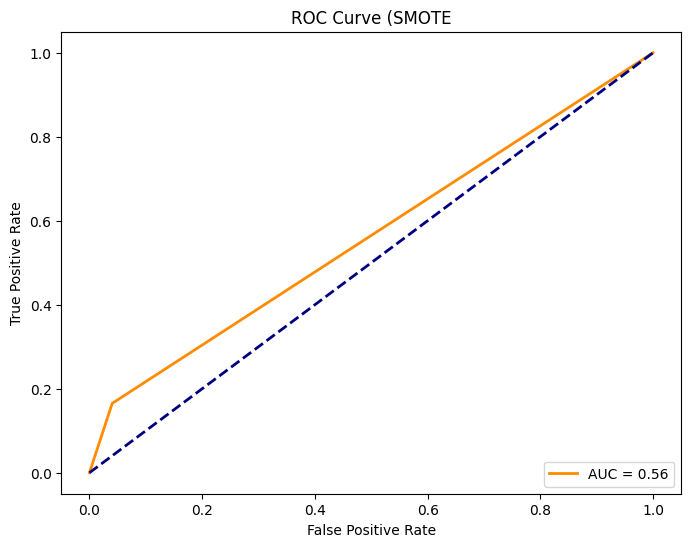

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/30
726/726 [==============================] - 6s 5ms/step - loss: 0.5830 - accuracy: 0.7045
Epoch 2/30
726/726 [==============================] - 5s 6ms/step - loss: 0.4740 - accuracy: 0.7702
Epoch 3/30
726/726 [==============================] - 4s 5ms/step - loss: 0.4446 - accuracy: 0.7857
Epoch 4/30
726/726 [==============================] - 3s 4ms/step - loss: 0.4244 - accuracy: 0.8009
Epoch 5/30
726/726 [==============================] - 2s 3ms/step - loss: 0.4092 - accuracy: 0.8125
Epoch 6/30
726/726 [==============================] - 3s 4ms/step - loss: 0.3973 - accuracy: 0.8168
Epoch 7/30
726/726 [==============================] - 4s 5ms/step - loss: 0.3888 - accuracy: 0.8240
Epoch 8/30
726/726 [==============================] - 4s 5ms/step - loss: 0.3825 - accuracy: 0.8271
Epoch 9/30
726/726 [==============================] - 3s 4ms/step - loss: 0.3775 - accuracy: 0.8293
Epoch 10/30
726/726 [==============================] - 2s 3ms/step - loss: 0.3726 - accuracy: 0.8356

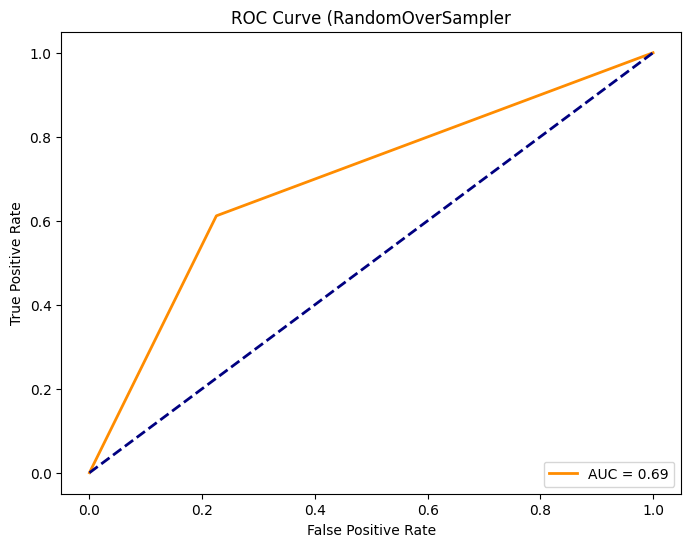

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/30
46/46 [==============================] - 2s 4ms/step - loss: 0.7100 - accuracy: 0.5311
Epoch 2/30
46/46 [==============================] - 0s 4ms/step - loss: 0.6541 - accuracy: 0.6098
Epoch 3/30
46/46 [==============================] - 0s 4ms/step - loss: 0.6210 - accuracy: 0.6616
Epoch 4/30
46/46 [==============================] - 0s 4ms/step - loss: 0.5973 - accuracy: 0.6844
Epoch 5/30
46/46 [==============================] - 0s 4ms/step - loss: 0.5788 - accuracy: 0.7086
Epoch 6/30
46/46 [==============================] - 0s 3ms/step - loss: 0.5632 - accuracy: 0.7196
Epoch 7/30
46/46 [==============================] - 0s 3ms/step - loss: 0.5501 - accuracy: 0.7362
Epoch 8/30
46/46 [==============================] - 0s 4ms/step - loss: 0.5385 - accuracy: 0.7459
Epoch 9/30
46/46 [==============================] - 0s 7ms/step - loss: 0.5277 - accuracy: 0.7521
Epoch 10/30
46/46 [==============================] - 0s 4ms/step - loss: 0.5183 - accuracy: 0.7555
Epoch 11/30
46/46 [

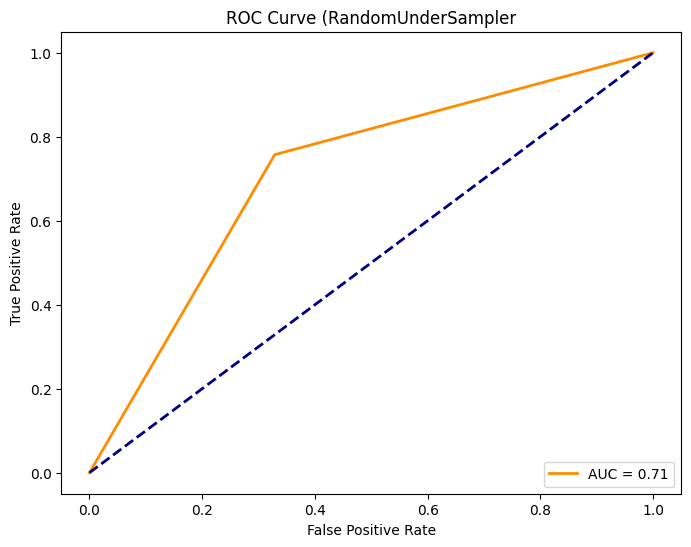

In [9]:
results = {}
scaler = StandardScaler()
#No Sampling
metrics = train_ann(X_train,y_train,X_test,y_test,'No Sampling')
results[metrics[0]] = metrics[1:]

# smote = SMOTE(random_state=42)
# X_smote, y_smote = smote.fit_resample(X_train, y_train)
X_smote, y_smote = smote(X_train, y_train)
X_train_scaled = scaler.fit_transform(X_smote)
X_test_scaled = scaler.transform(X_test)
metrics = train_ann(X_train_scaled, y_smote, X_test_scaled, y_test,'SMOTE')
results[metrics[0]] = metrics[1:]

# ros = RandomOverSampler(random_state=42)
# X_over, y_over = ros.fit_resample(X_train, y_train)
X_over, y_over = oversample(X_train, y_train)
X_train_scaled = scaler.fit_transform(X_over)
X_test_scaled = scaler.transform(X_test)
metrics = train_ann(X_train_scaled, y_over, X_test_scaled, y_test,'RandomOverSampler')
results[metrics[0]] = metrics[1:]


# rus = RandomUnderSampler(random_state=42)
# X_under, y_under = rus.fit_resample(X_train, y_train)
X_under, y_under = undersample(X_train, y_train)
X_train_scaled = scaler.fit_transform(X_under)
X_test_scaled = scaler.transform(X_test)
metrics = train_ann(X_train_scaled, y_under, X_test_scaled, y_test,'RandomUnderSampler')
results[metrics[0]] = metrics[1:]

# X_ncr, y_ncr = ncr(X_train, y_train)
# metrics = train_ann(X_ncr, y_ncr, X_test, y_test,'NCR')
# results[metrics[0]] = metrics[1:]

In [10]:
sampling_techniques = list(results.keys())
metrics = ['Recall', 'Precision', 'F1 Score', 'Accuracy']
results_df = pd.DataFrame.from_dict(results, orient='index', columns=metrics)
sorted_df = results_df.sort_values(by=['F1 Score', 'Precision', 'Recall', 'Accuracy'], ascending=False)
sorted_df

,Recall,Precision,F1 Score,Accuracy
RandomOverSampler,61.17,16.28,25.71,76.39
RandomUnderSampler,75.73,14.16,23.85,67.70
No Sampling,28.16,17.58,21.64,86.38
SMOTE,16.50,22.67,19.10,90.66


```Hyper-Parameter Tuning```

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

# Define the function to create the model
def create_model(optimizer='adam', activation='relu', dropout_rate=0.0, hidden_units=16, learning_rate=0.01):
    model = keras.Sequential()
    model.add(layers.Dense(hidden_units, activation=activation, input_shape=(55,)))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create a KerasClassifier for use in GridSearchCV
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=0,activation = "relu", 
                        dropout_rate=0,hidden_units=16, learning_rate=0.01)

# Define the hyperparameters to tune
param_grid = {
    'optimizer': ['adam', 'sgd', 'rmsprop'],  # Optimizer choices
    'activation': ['relu', 'tanh', 'sigmoid'],  # Activation functions
    'hidden_units': [16, 32, 64],  # Number of neurons in the hidden layer(s)
    'learning_rate': [0.001, 0.01, 0.1],  # Learning rate for the optimizer
    'batch_size': [32, 20, 10],  # Batch size for training
    'epochs': [40, 20, 30],  # Number of training epochs
    'dropout_rate': [0.0, 0.2, 0.4],
}

# Perform grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=make_scorer(f1_score), cv=3, n_jobs=-1)
grid_result = grid.fit(X_over, y_over)

# Print the best parameters and accuracy
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
